# Distortion

In [45]:
# Setup
from scipy.io import wavfile
import numpy as np
import sounddevice as sd
import soundfile as sf
import matplotlib.pyplot as plt
from scipy import signal
import sys
import requests
import io

# URL of the raw wave file on GitHub
# un-comment the URL of the file you want to use
# ATF Drums
#github_url = "https://raw.githubusercontent.com/kevbrnen/Music-Technology-Final-Project/main/Sound%20Examples/Testing_Files/Around%20the%20fur%20drums.wav"
# KYW inst
github_url = "https://raw.githubusercontent.com/kevbrnen/Music-Technology-Final-Project/main/Sound%20Examples/Testing_Files/KYW%20Inst.wav"

# Fetch the wave file from GitHub
response = requests.get(github_url)

# Check if the request was successful
if response.status_code == 200:
    # Read the wave data from the response content
    wave_data = io.BytesIO(response.content)
    
    # Read the wave file 
    fs, data = wavfile.read(wave_data)
    
else:
    print("Failed to fetch the wave file from GitHub")


# Get the bit depth of the audio data (assumes audio_data is a NumPy array)
bit_depth = data.dtype.itemsize * 8

# Calculate the scaling factor for normalization
scaling_factor = 2 ** (bit_depth - 1)  # For signed audio

# Convert audio data to floating-point values and normalize
data = data.astype(np.float32) / scaling_factor

# Verify that the data is now in the range -1 to 1
print(f"Min Value: {np.min(data)}")
print(f"Max Value: {np.max(data)}")

Min Value: -0.9484677314758301
Max Value: 0.9998999834060669


### Clipping Distortion

In [46]:
Clipping_out = np.zeros((len(data), 2))
dist_gain = 10

data = data*dist_gain

for i in range(len(data)):
    for j in range(2):
        if(data[i, j] <=-1):
            Clipping_out[i, j] = -1

        elif(-1 <= data[i, j] and data[i, j] <=1):
            Clipping_out[i, j] = data[i, j]

        elif(data[i, j] >= 1):
            Clipping_out[i, j] = 1

Text(0.5, 1.0, 'Clipping Distortion Output')

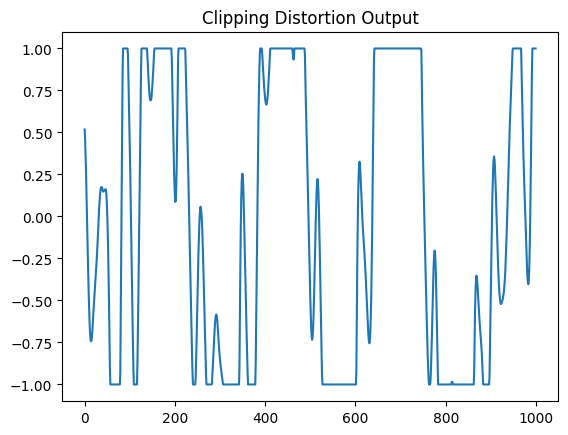

In [47]:
plt.plot(Clipping_out[1000:2000, 0])
plt.title("Clipping Distortion Output")

### Square Distortion

In [48]:
Square_out = np.zeros((len(data), 2))

for i in range(len(data)):
    for j in range(2):
        if(data[i, j] < 0):
            Square_out[i, j] = -1

        elif(data[i, j] >= 0):
            Square_out[i, j] = 1


Text(0.5, 1.0, 'Square Distortion Output')

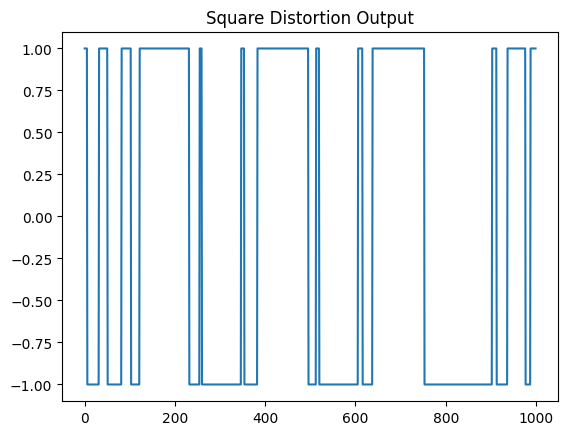

In [49]:
plt.plot(Square_out[1000:2000, 0])
plt.title("Square Distortion Output")

### Soft Cube Clipping Distortion

In [50]:
Cube_out = np.zeros((len(data), 2))

for i in range(len(data)):
    for j in range(2):
        if(data[i, j] <=-1):
            Cube_out[i, j] = -(2/3)

        elif(-1 <= data[i, j] and data[i, j] <=1):
            Cube_out[i, j] = data[i, j] - (data[i, j]**3/3)

        elif(data[i, j] >= 1):
            Cube_out[i, j] = 1

Text(0.5, 1.0, 'Soft Cube Distortion Output')

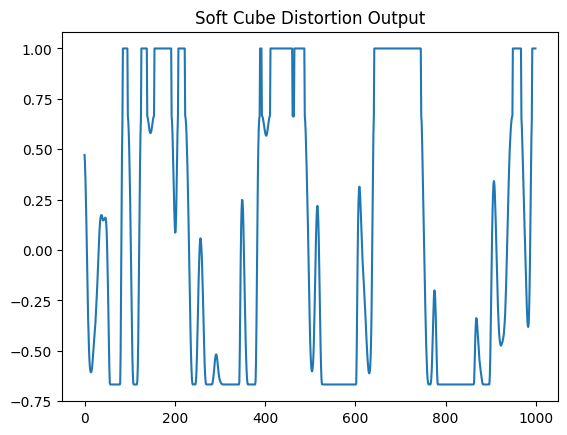

In [51]:
plt.plot(Cube_out[1000:2000, 0])
plt.title("Soft Cube Distortion Output")

### Tanh Distortion

In [52]:
tanh_out = np.zeros((len(data), 2))

for i in range(len(data)):
    for j in range(2):
        tanh_out[i, j] = np.tanh(data[i, j])

Text(0.5, 1.0, 'tanh() Distortion Output')

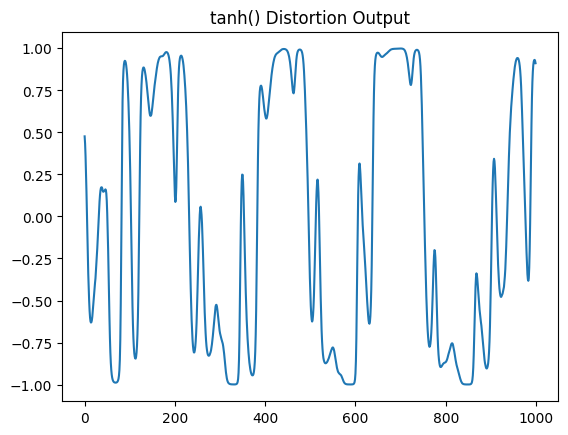

In [53]:
plt.plot(tanh_out[1000:2000, 0])
plt.title("tanh() Distortion Output")